# **EDA Assignment Questions**

# **EDA - 1**
## Title: Bike Details Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io # Import the io module to read the uploaded file

uploaded = files.upload()

# Assuming the uploaded file is a CSV and there's only one file uploaded
# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))

# Now you can access the DataFrame 'df'
# 1.What is the range of selling prices in the datasetD
print("Range of Selling Prices:")
print("Min:", df['selling_price'].min(), "Max:", df['selling_price'].max())

Saving BIKE DETAILS.csv to BIKE DETAILS (4).csv
Range of Selling Prices:
Min: 5000 Max: 760000


In [ ]:
# 2.  What is the median selling price for bikes in the dataset
print("Median Selling Price:", df['selling_price'].median())


Median Selling Price: 45000.0


In [ ]:
#3. What is the most common seller type?
print("Most Common Seller Type:")
print(df['seller_type'].value_counts().idxmax())

Most Common Seller Type:
Individual


In [ ]:
#4.How many bikes have driven more than 50,000 kilometers?
print("Bikes Driven More Than 50,000 Kilometers:", (df['km_driven'] > 50000).sum())

Bikes Driven More Than 50,000 Kilometers: 170


In [ ]:
#5. What is the average km_driven value for each ownership type?
print("Average KM Driven for Each Ownership Type:")
print(df.groupby('owner')['km_driven'].mean())

Average KM Driven for Each Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6.What proportion of bikes are from the year 2015 or older?
print("Proportion of Bikes from 2015 or Older:", (df['year'] >= 2015).mean())



Proportion of Bikes from 2015 or Older: 0.527803958529689


In [ ]:
#7.What is the trend of missing values across the dataset?
print("Missing Values Trend:")
print(df.isnull().sum())

Missing Values Trend:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
print("Highest Ex-Showroom Price and Bike:")
print(df[df['ex_showroom_price'] == df['ex_showroom_price'].max()][['name', 'ex_showroom_price']])

Highest Ex-Showroom Price and Bike:
                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [ ]:
#9.What is the total number of bikes listed by each seller type?
print("Total Bikes Listed by Seller Type:")
print(df['seller_type'].value_counts())

Total Bikes Listed by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_df = df[df['owner'] == 'First Owner']

In [ ]:
#11.Identify and remove outliers in the km_driven column using the IQR method.
q1 = df['km_driven'].quantile(0.25)

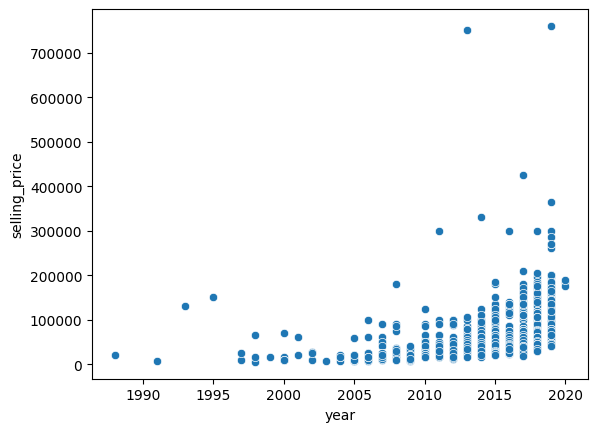

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.scatterplot(x='year', y='selling_price', data=df)
plt.show()

In [ ]:
#13.What is the average depreciation in selling price based on the bike’s age (current year – manufacturing year)?
current_year = 2023
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation = df.groupby('age')['depreciation'].mean()

In [ ]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean()

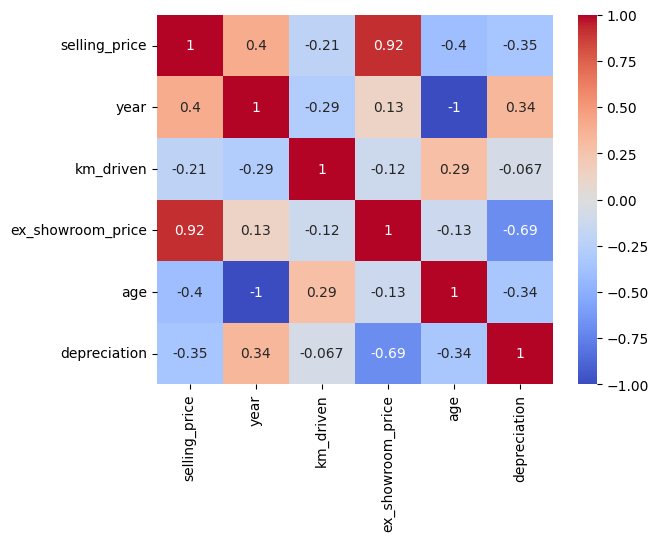

In [ ]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



# **EDA - 2**
# Title: Car Sale Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io


df = pd.read_csv(io.BytesIO(uploaded['Car Sale.csv']))
df.head()


Saving Car Sale.csv to Car Sale.csv


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers
print("Average Selling Price by Dealer:\n", df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False))


Average Selling Price by Dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.5

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
print("Car Brand with Highest Variation in Prices:\n", df.groupby('Company')['Price ($)'].std().idxmax())


Car Brand with Highest Variation in Prices:
 Lincoln


In [ ]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
print("Distribution of Car Prices by Transmission Type:\n", df.groupby('Transmission')['Price ($)'].describe())

Distribution of Car Prices by Transmission Type:
                 count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


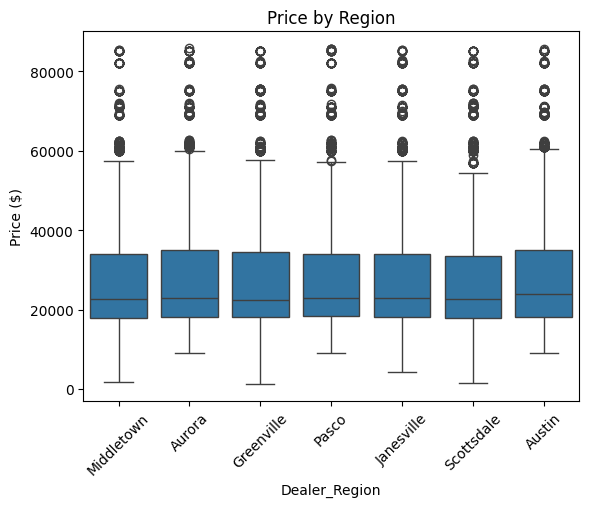

In [ ]:
#4.What is the distribution of car prices across different regions?
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Price by Region")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#5.What is the distribution of cars based on body styles?
print("Distribution of Cars by Body Style:\n", df['Body Style'].value_counts())


Distribution of Cars by Body Style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


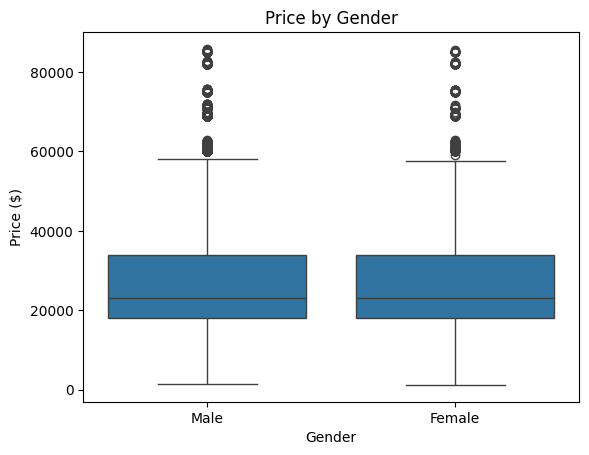

In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
sns.boxplot(data=df, x='Gender', y='Price ($)')
plt.title("Price by Gender")
plt.show()

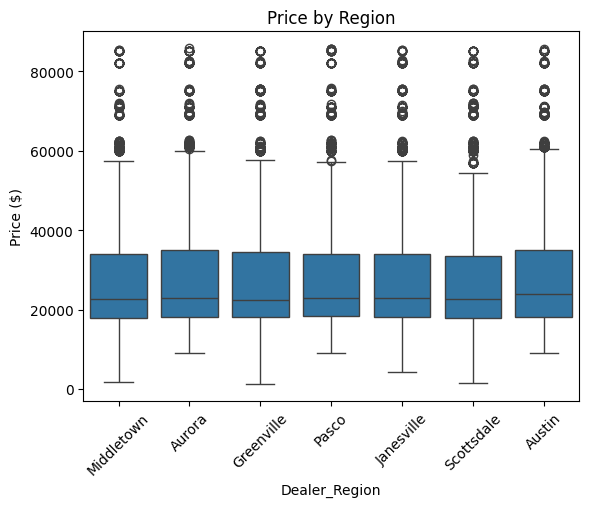

In [ ]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Price by Region")
plt.xticks(rotation=45)
plt.show()

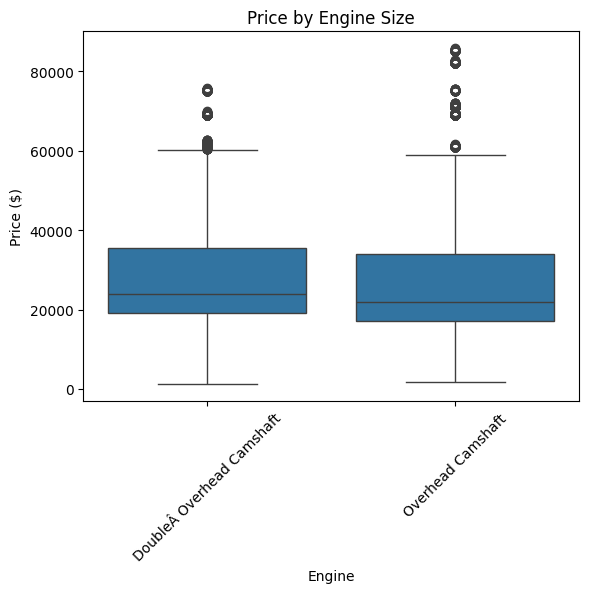

In [ ]:
#8.How does the average car price differ between cars with different engine sizes?
sns.boxplot(data=df, x='Engine', y='Price ($)')
plt.title("Price by Engine Size")
plt.xticks(rotation=45)
plt.show()

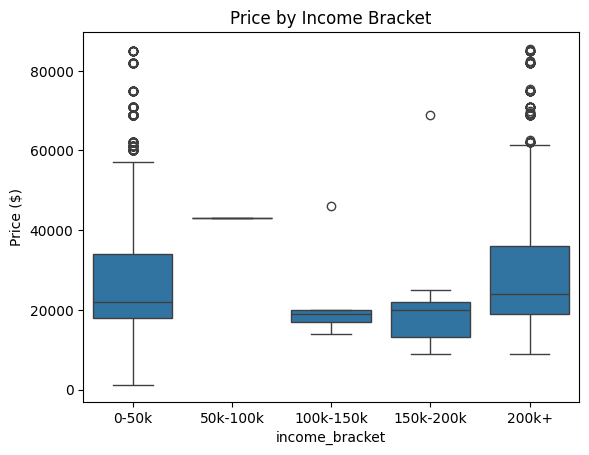

In [ ]:
#9.How do car prices vary based on the customer’s annual income bracket?
df['income_bracket'] = pd.cut(df['Annual Income'], bins=[0,50000,100000,150000,200000,500000], labels=['0-50k','50k-100k','100k-150k','150k-200k','200k+'])
sns.boxplot(data=df, x='income_bracket', y='Price ($)')
plt.title("Price by Income Bracket")
plt.show()

In [ ]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
print("Top 5 Car Models with Highest Sales:\n", df.groupby('Model')['Price ($)'].count().nlargest(5))

Top 5 Car Models with Highest Sales:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: Price ($), dtype: int64


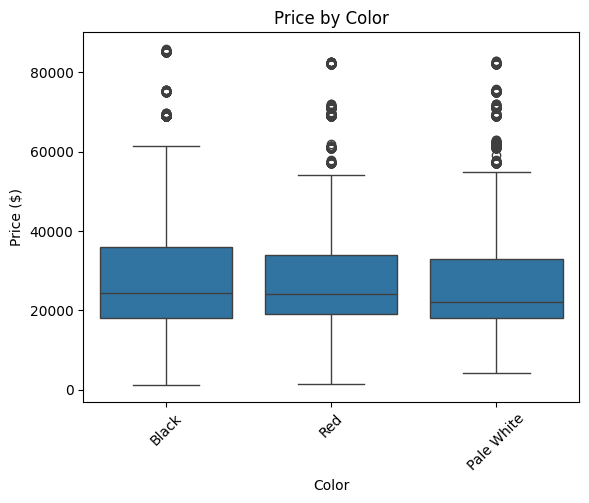

In [ ]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?
sns.boxplot(data=df, x='Color', y='Price ($)')
plt.title("Price by Color")
plt.xticks(rotation=45)
plt.show()

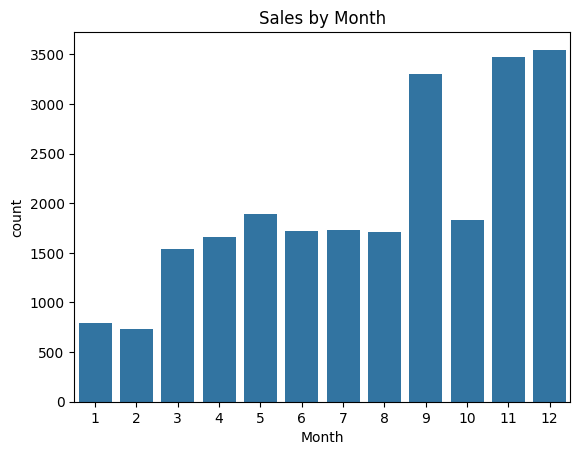

In [ ]:
#12.Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sns.countplot(data=df, x='Month')
plt.title("Sales by Month")
plt.show()

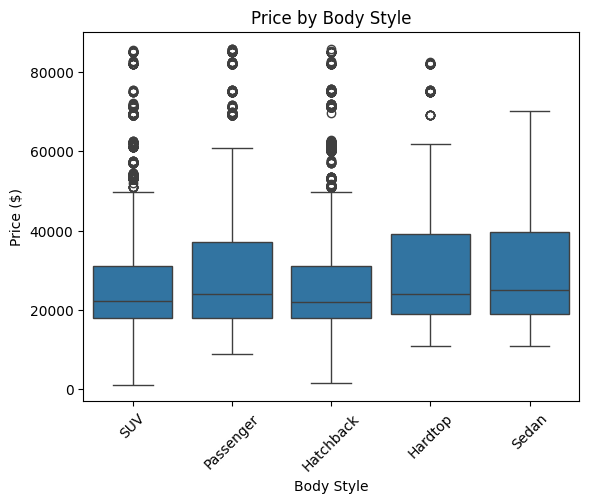

In [ ]:
#13.How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(data=df, x='Body Style', y='Price ($)')
plt.title("Price by Body Style")
plt.xticks(rotation=45)
plt.show()

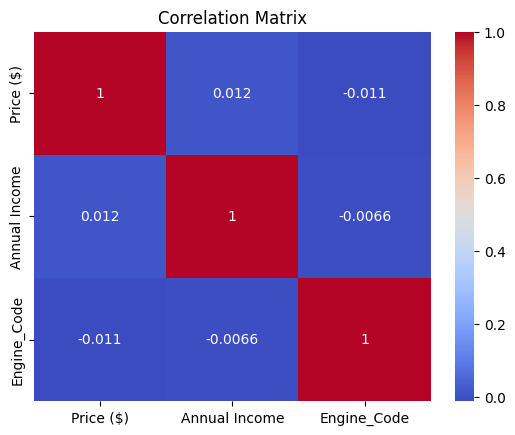

In [ ]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df['Engine_Code'] = df['Engine'].astype('category').cat.codes
sns.heatmap(df[['Price ($)', 'Annual Income', 'Engine_Code']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

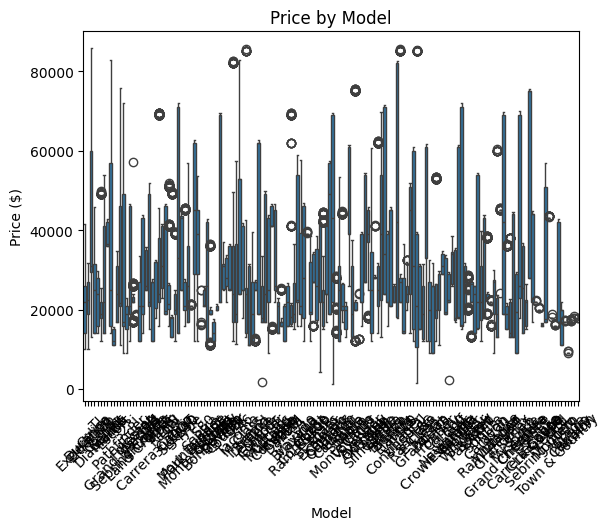

In [ ]:
#15.How does the average car price vary across different car models and engine types?
sns.boxplot(data=df, x='Model', y='Price ($)')
plt.title("Price by Model")
plt.xticks(rotation=45)
plt.show()


# EDA - 3
# Amazon Sales Data


In [3]:
from google.colab import files
import pandas as pd

# Upload your amazon.csv file
uploaded = files.upload()

# Load the file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))


Saving amazon.csv to amazon.csv


In [5]:
# Price columns
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Rating columns
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Category and reviews
df['main_category'] = df['category'].str.split('|').str[0]
df['first_review_title'] = df['review_title'].str.split(',').str[0]
df['first_review_content'] = df['review_content'].str.split(',').str[0]




In [7]:
#1.What is the average rating for each product category?
print("Average rating for each product category:\n", df.groupby('category')['rating'].mean())

Average rating for each product category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProdu

In [8]:
# 2. Top products by rating_count in each category
top_products = df.groupby('category')['rating_count'].idxmax()
print("Top products by rating_count in each category:\n", df.loc[top_products, ['category', 'product_name', 'rating_count']])

Top products by rating_count in each category:
                                                category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0  
906   Hp Wired On Ear Headp

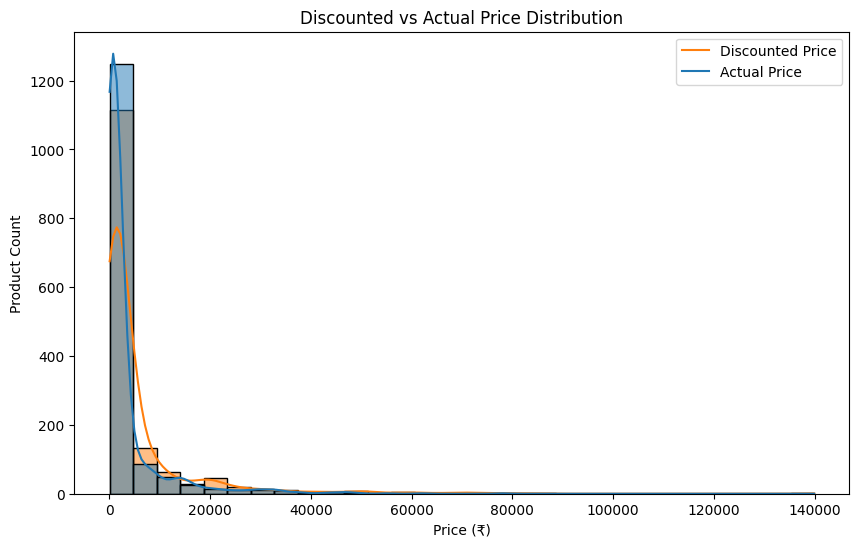

In [10]:
#3. What is the distribution of discounted prices vs. actual prices?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df[['discounted_price', 'actual_price']], bins=30, kde=True)
plt.title("Discounted vs Actual Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Product Count")
plt.legend(['Discounted Price', 'Actual Price'])
plt.show()


In [11]:
#4.How does the average discount percentage vary across categories?
print("Average discount percentage by category:\n", df.groupby('category')['discount_percentage'].mean())

Average discount percentage by category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pen

In [13]:
#5. What are the most popular product names?
popular_products = df.sort_values('rating_count', ascending=False)[['product_name', 'rating_count']].head(10)
print(popular_products)


                                          product_name  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0


In [14]:
#6.What are the most popular product keywords?
popular_keywords = df['review_title'].str.split(',').explode().value_counts().head(10)
print(popular_keywords)

review_title
Good               691
Good product       443
Value for money    183
Nice               171
Nice product       150
Good quality        99
Good Product        81
Ok                  80
Good one            76
good                54
Name: count, dtype: int64


In [16]:
#7. What are the most popular product reviews?
popular_reviews = df['first_review_title'].value_counts().head(10)
print(popular_reviews)

first_review_title
Good                                        75
Good product                                58
Nice                                        19
Nice product                                17
Value for money                             14
Worked on iPhone 7 and didn’t work on XR    10
Worth the price                              9
Phone                                        8
Good Product                                 8
Satisfied                                    8
Name: count, dtype: int64


In [17]:
#8.What is the correlation between discounted_price and rating?
print("Correlation between discounted_price and rating:\n", df['discounted_price'].corr(df['rating']))

Correlation between discounted_price and rating:
 0.12033741712288548


In [18]:
#9. What are the Top 5 categories based on the highest rating?
top_categories = df.groupby('category')['rating'].mean().nlargest(5)
print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [19]:
#10.  Identify any potential areas for improvement or optimization based on the data analysis?
print("Suggestions:")
print("- Consider increasing discounts in lower-rated categories.")
print("- Improve product descriptions in categories with fewer ratings.")
print("- Encourage more reviews on high-rated, low-rating_count products.")



Suggestions:
- Consider increasing discounts in lower-rated categories.
- Improve product descriptions in categories with fewer ratings.
- Encourage more reviews on high-rated, low-rating_count products.


# **EDA - 4**
# Spotify Dataset

In [82]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['spotify (2).csv']))
df.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [83]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful?
df.isnull().sum()


,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [89]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10,5))
# Replace 'popularity' with the correct column name found from df.columns


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [95]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify (4).csv


In [96]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Check for nulls and duplicates
print(df.info())
print("Null values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("New shape after removing duplicates:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None
Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27
New shape after removing duplicates: (413, 5)


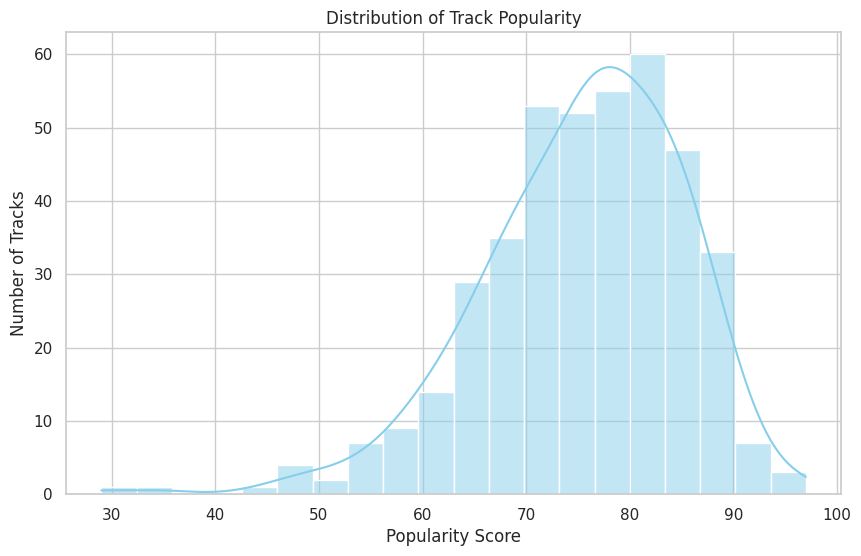

In [98]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df["Popularity"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Tracks")
plt.show()

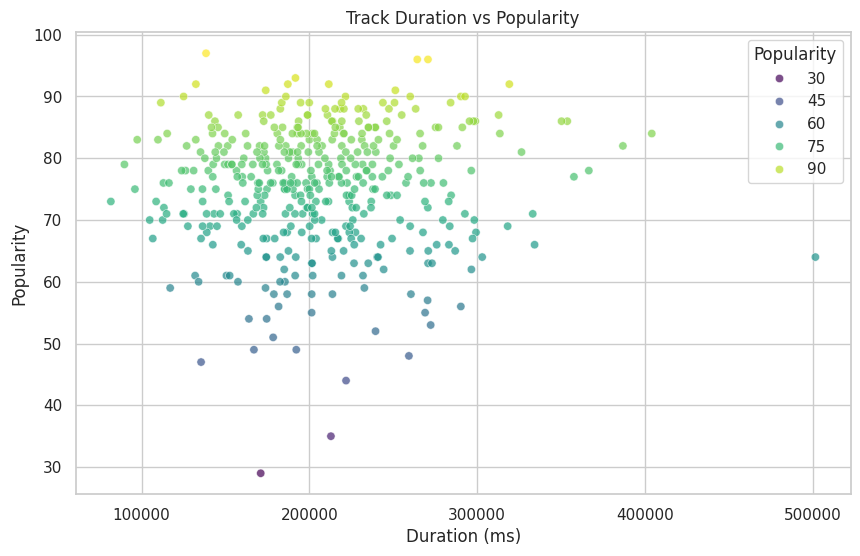

In [100]:
#3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration (ms)", y="Popularity", hue="Popularity", palette="viridis", alpha=0.7)
plt.title("Track Duration vs Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


<ipython-input-103-824c845c3e1b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', order=top_artists.index, palette="Set2")


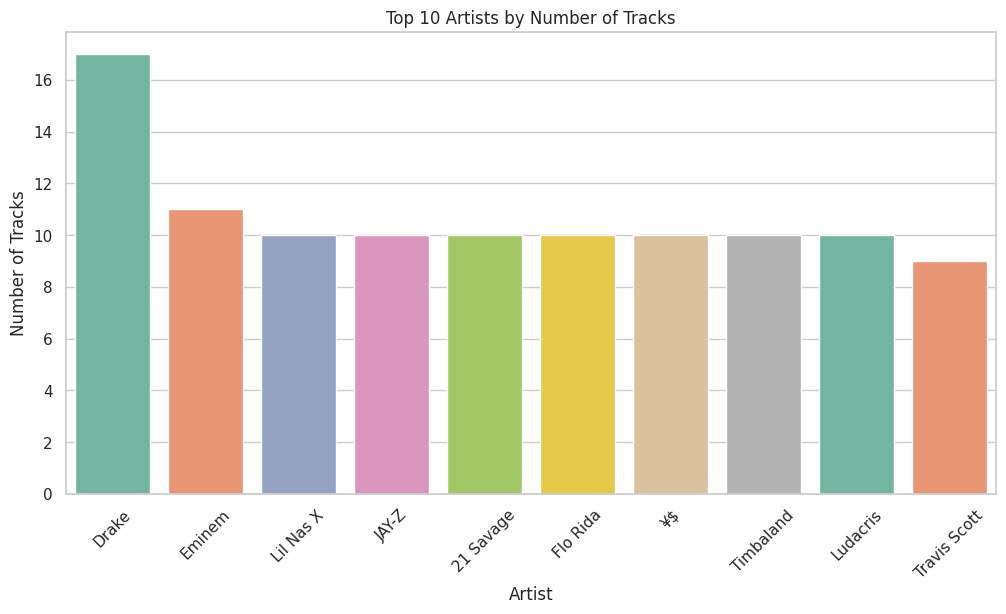

In [103]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(12, 6))
top_artists = df['Artist'].value_counts().nlargest(10)
sns.countplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', order=top_artists.index, palette="Set2")
plt.title("Top 10 Artists by Number of Tracks")
plt.xticks(rotation=45)
plt.ylabel("Number of Tracks")
plt.show()


In [104]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular_tracks = df.nsmallest(5, 'Popularity')
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [106]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top_artists = df['Artist'].value_counts().nlargest(5)

In [109]:
#7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
top_artists = df['Artist'].value_counts().nlargest(5)

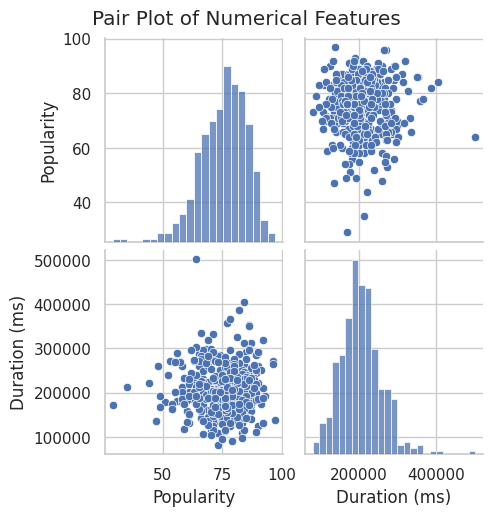

In [111]:
#8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot?
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

<ipython-input-112-849e7187d53d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Artist'].isin(top_artists_for_box)], x='Artist', y='Duration (ms)', palette="coolwarm")


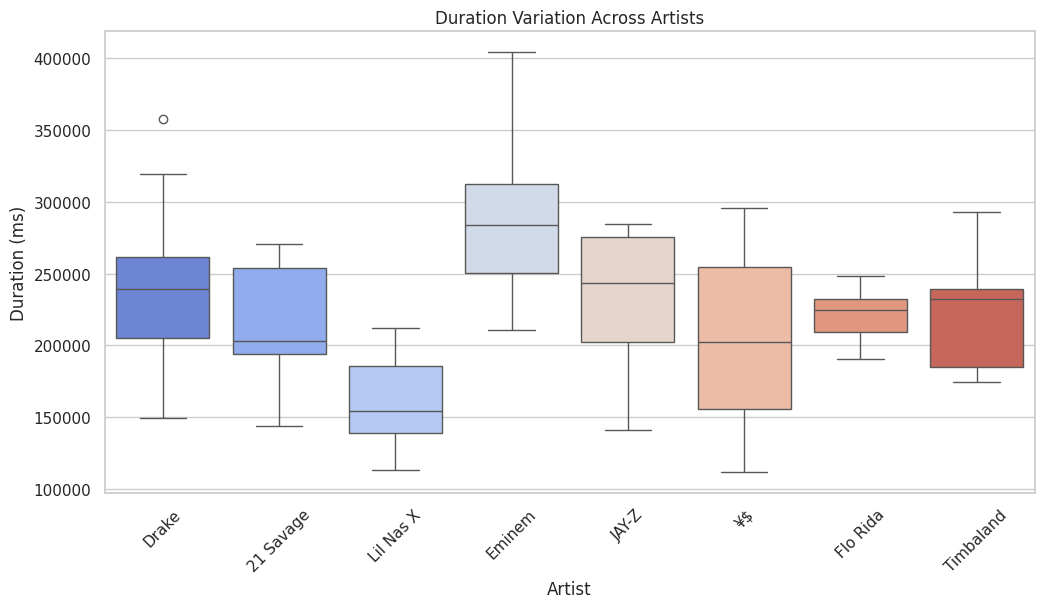

In [112]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
plt.figure(figsize=(12, 6))
top_artists_for_box = df['Artist'].value_counts().nlargest(8).index
sns.boxplot(data=df[df['Artist'].isin(top_artists_for_box)], x='Artist', y='Duration (ms)', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Duration Variation Across Artists")
plt.show()

<ipython-input-114-26208c3ea48d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Artist'].isin(top_artists_for_box)], x='Artist', y='Popularity', palette="magma")


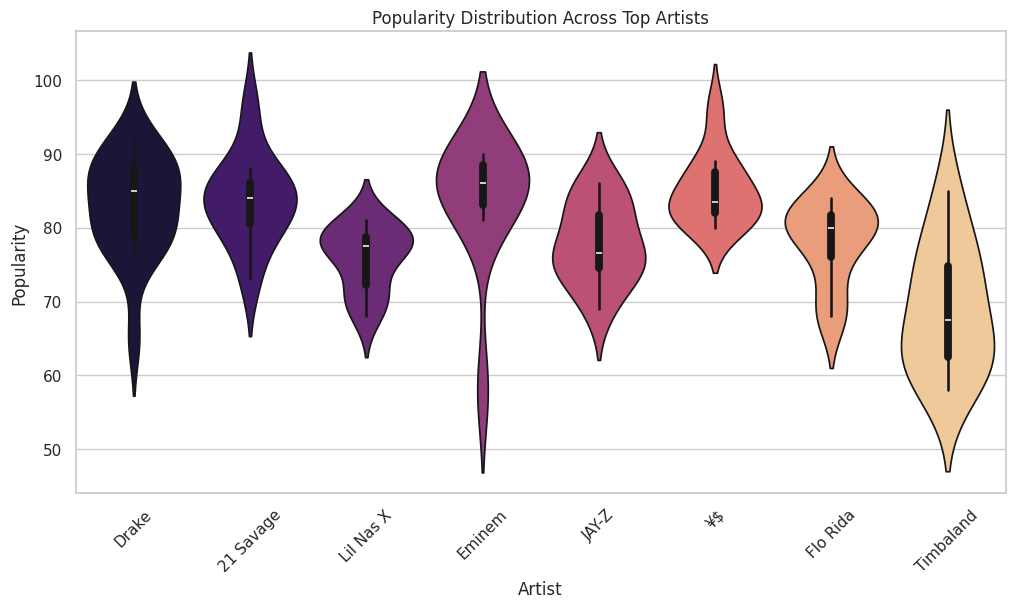

In [114]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['Artist'].isin(top_artists_for_box)], x='Artist', y='Popularity', palette="magma")
plt.xticks(rotation=45)
plt.title("Popularity Distribution Across Top Artists")
plt.show()
